# Klasyfikacja

- Regresja - przewidywanie wartości ciągłej
- Klasyfikacja - przewidywanie etykiety: skończony zbiór, nieuporządkowany
 - binarna - 1 z 2 klas (oznaczonych często jako 0 i 1)
 - wieloklasowa - 1 z wielu klas
 

Jakość klasyfikacji binarnej możemy mierzyć przykładowo oceniając:
- dokładność (accuracy) predykcji binarnych

In [3]:
from sklearn.metrics import accuracy_score
y_true = [0, 0, 1, 1]
y_pred = [1, 0, 1, 0]
print(accuracy_score(y_true, y_pred))

0.5


- błąd logistyczny (logistic loss) predykcji prawdopodobieństwa określonej klasy

In [4]:
from sklearn.metrics import log_loss
y_true = [0, 0, 1, 1]
y_pred = [(0.6, 0.4), (0.4, 0.6),(0.6, 0.4), (0.4, 0.6)]
print(log_loss(y_true, y_pred))

0.7135581778200728


# Funkcja liniowa a regresja logistyczna

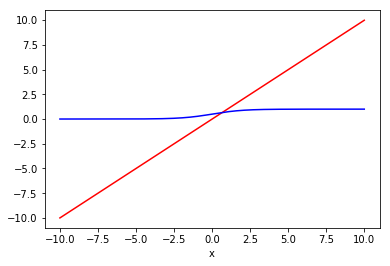

In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt

def sigma(t):
    return [1/(1 + math.exp(-t1)) for t1 in t]

def f(x, w, b):
    return [np.dot(x1, w)[0] + b for x1 in x]

w = np.array([1])
b = 0
x = np.arange(-10, 10, 0.01)

plt.plot(x, f(x, w, b), 'r')
plt.plot(x, sigma(f(x, w, b)), 'b')
plt.xlabel("x")
plt.show()

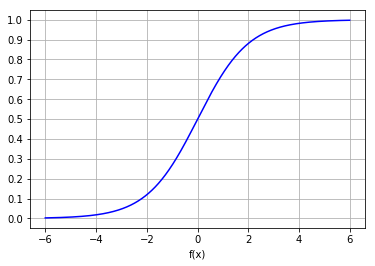

In [9]:
x = np.arange(-6, 6, 0.01)
plt.plot(x, sigma(x), 'b')
plt.grid(True)
plt.yticks(np.arange(0, 1.1, step=0.1))
plt.xlabel("f(x)")
plt.show()

![regresja logistyczna](logistic_regression/lf.svg)


![regresja logistyczna](logistic_regression/lfp.png)


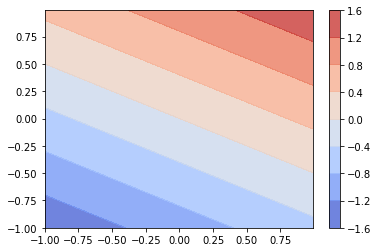

In [10]:
w = [0.5, 1]
b = 0

def f(x, w, b):
    return [np.dot(x1, w) + b for x1 in x]

x1_min = -1
x1_max = 1
x2_min = -1
x2_max = 1
h = 0.01
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                     np.arange(x2_min, x2_max, h))

y = np.array(f(np.c_[xx1.ravel(), xx2.ravel()], w, b))
y = y.reshape(xx1.shape)
plt.contourf(xx1, xx2, y, cmap=plt.cm.coolwarm, alpha=0.8, vmin = -1.6, vmax = 1.6)
plt.colorbar()
plt.show()

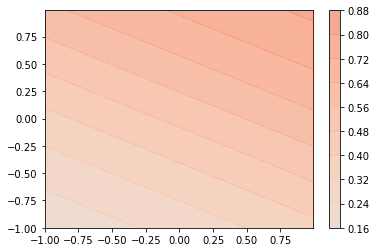

In [12]:
y = np.array(sigma(f(np.c_[xx1.ravel(), xx2.ravel()], w, b)))
y = y.reshape(xx1.shape)
plt.contourf(xx1, xx2, y, cmap=plt.cm.coolwarm, alpha=0.8, vmin = -1.6, vmax = 1.6)
plt.colorbar()
plt.show()

# Klasyfikacja z użyciem regresji logistycznej

Regresja logistczna może dostarczać prawdopodobieństwa:

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = LogisticRegression(fit_intercept=True).fit(X_train, y_train)

y_train_pred_proba = clf.predict_proba(X_train)
y_train_pred = clf.predict(X_train)
print("Accuracy train: ", accuracy_score(y_train, y_train_pred))

y_test_pred_proba = clf.predict_proba(X_test)
y_test_pred = clf.predict(X_test)
print("Accuracy test: ", accuracy_score(y_test, y_test_pred))

Accuracy train:  0.9606299212598425
Accuracy test:  0.9414893617021277


Domyślnie przewiduje się daną klasę (np pozytywną) od progu 0.5. Jest to właściwa strategia dla miary accuracy.
Jednak dla innych miar oceny próg ten może być inny. Przykładowo gdy pewne pomyłki są gorsze w skótkach niż inne (np. wskazanie, że dana osoba jest zdrowa, podczas gdy jest chora może być gorszą pomyłką niż stwierdzenie, że osoba jest chora, podczas gdy jest zdrowa).

In [17]:
print(clf.classes_)
print(y_test_pred_proba[0])
print(y_test_pred[0])

[0 1]
[0.98821831 0.01178169]
0


# Regresja vs sieci neuronowe

Sieci neuronowe w podstawowej formie, to złożenie wielu funkcji liniowych z nieliniowymi funkcjami aktywacji, dzięki czemu mogą one aproksymować także funkcje nieliniowe. (gdyby nie było nieliniowej aktywacji bylyby toższame z funkcją liniową)


![](logistic_regression/neuronlinear.png)



![](logistic_regression/neuronact.png)

![](logistic_regression/nn.png)